In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from classicalfield_orig import FiniteTempGPE as gpe 
from VortexLabeling import VortexTracker as vt 
from VortexLabeling import CompareDistances as comp
from PointTracking_v2 import PointTracker as pt

In [2]:
g = gpe(npoints = 2**6, numImagSteps = 2000, numRealSteps = 500000, dtcoef = 0.0005, boxthickness = 0.4, Nsamples = 1, runAnim = False, Tfact = 1, dst = False, vortex = True)

Total Imag Time:  1.3158142566680908
kmax:  4.0212385965949355
T:  8.085179925372403


KeyboardInterrupt: 

In [ ]:
v = vt(g.snaps, g.L, g.dx) 
times,dist = zip(*v.distances) 
times,angles = zip(*v.angles)

In [20]:
# try with just two vortices 

def generalAnimation(filename, dataset, periodic = False): 
    time_tracking = np.arange(0, len(dataset))*250*g.gpeobj.dt
    if filename != None: 
            path = fr"C:\Users\TQC User\Desktop\BECs2\{filename}.mp4"
    fig, ax = plt.subplots() 
    if not periodic: 
        data = plt.imshow(dataset[0],  extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], origin = 'lower')
    else: 
        data = plt.imshow(dataset[0], extent = [-g.winL/2, g.winL/2, -g.winL/2, g.winL/2], cmap = 'twilight', origin = 'lower')
    plt.colorbar() 
    plt.clim(-2*np.pi, 2*np.pi)

     
    L = g.L

    # avi_traj1 = antiv_traj_arr[0] # the trajecory of the ith antivortex 
    # v1 = plt.scatter(avi_traj1[0][0]+0.5-L/2, avi_traj1[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')

    # avi_traj2 = antiv_traj_arr[1] # the trajecory of the ith antivortex 
    # v2 = plt.scatter(avi_traj2[0][0]+0.5-L/2, avi_traj2[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')


    # try storing in an array 
#     vort_arr = [] 
    
#     for i in range(len(antiv_traj_arr)): 
#          avi_traj = antiv_traj_arr[i] 
#          v = plt.scatter(avi_traj[0][0]+0.5-L/2, avi_traj[0][1]+0.5-L/2, alpha = 0.3, s = 20, color = 'blue')
#          vort_arr.append(v) 
    ### 
    # v1 = vort_arr[0]
    # v2 = vort_arr[1]


    time_text = ax.text(0.05, 0.95,'',horizontalalignment='left',verticalalignment='top', transform=ax.transAxes,  bbox=dict(facecolor='red', alpha=0.5))
    time_text.set_text('time = 0')

    plt.xlabel("x", fontsize = 16)
    plt.ylabel('y', fontsize = 16)
    plt.title(f'Animation for L={L}')

    def animate(i): 
        data.set_data(dataset[i])


     #    for j in range(len(vort_arr)): 
     #         vort_arr[j].set_offsets([antiv_traj_arr[j][i][0]+0.5-L/2, antiv_traj_arr[j][i][1]+0.5-L/2])
 
        time_text.set_text('time = %.1d' % time_tracking[i]) # find an array that tracks the time or define one based on dt and the number of points 
        #return data, time_text

        #vort_arr = [v1,v2]
        return data, time_text
    anim = animation.FuncAnimation(fig, animate, frames = len(dataset), blit = True)
    anim.save(path)
    
    plt.show() 

    return anim 
    

In [21]:
tracker = pt(g.snaps, g.dx, g.L, g.gpeobj.dt)
circ_frames = np.zeros((len(g.snaps), len(g.snaps[0])//2, len(g.snaps[0])//2))
vort = []
avort = []
for i in range(len(g.snaps)): 
    detection = pt.detectVortices(tracker, g.snaps[i])
    circ_frames[i] = detection[2] 
    vort.append(detection[0]) 
    avort.append(detection[1])

In [ ]:
generalAnimation("circ_.mp4", circ_frames)

In [23]:
tracks = v.track_vortices_across_frames(avort)

In [ ]:
print(tracks[0]) 

In [ ]:
print(np.shape(track1))

In [ ]:
time = 100
plt.imshow(circ_frames[time], origin = 'lower', extent = [-g.L/2, g.L/2, -g.L/2, g.L/2])
# for i in range(len(tracks)): 
#     for j in range(len(tracks[i])): 
#         if tracks[i][j][0] == time: 
#             print(i)
track1 = tracks[0] 
track2 = tracks[1] 

plt.scatter(track1[time][1]-g.L/2, track1[time][2]-g.L/2, alpha = 0.2, color = 'red')
plt.text(track1[time][1]-g.L/2, track1[time][2]-g.L/2, 1)

plt.scatter(track2[time][1]-g.L/2, track2[time][2]-g.L/2, alpha = 0.2, color = 'red')
plt.text(track2[time][1]-g.L/2, track2[time][2]-g.L/2, 2)

### Make the analysis and average over values 

In [22]:
c = comp(numRealSteps = 50000, numSamples = 20, temperatures = np.arange(0,1.1,0.2))

Total Imag Time:  1.325751543045044
kmax:  4.0212385965949355
T:  0.0
(201, 128, 128)
(1, 128, 128)
Total Imag Time:  1.3001503944396973
kmax:  4.0212385965949355
T:  0.0
(201, 128, 128)
(1, 128, 128)
Total Imag Time:  1.3030099868774414
kmax:  4.0212385965949355
T:  0.0
(201, 128, 128)
(1, 128, 128)
Total Imag Time:  1.3009328842163086
kmax:  4.0212385965949355
T:  0.0
(201, 128, 128)
(1, 128, 128)
Total Imag Time:  1.2970373630523682
kmax:  4.0212385965949355
T:  0.0
(201, 128, 128)
(1, 128, 128)
Total Imag Time:  1.3474211692810059
kmax:  4.0212385965949355
T:  0.0
(201, 128, 128)
(1, 128, 128)
Total Imag Time:  1.2952191829681396
kmax:  4.0212385965949355
T:  0.0
(201, 128, 128)
(1, 128, 128)
Total Imag Time:  1.2981319427490234
kmax:  4.0212385965949355
T:  0.0
(201, 128, 128)
(1, 128, 128)
Total Imag Time:  1.2996573448181152
kmax:  4.0212385965949355
T:  0.0
(201, 128, 128)
(1, 128, 128)
Total Imag Time:  1.3006513118743896
kmax:  4.0212385965949355
T:  0.0
(201, 128, 128)
(1, 1

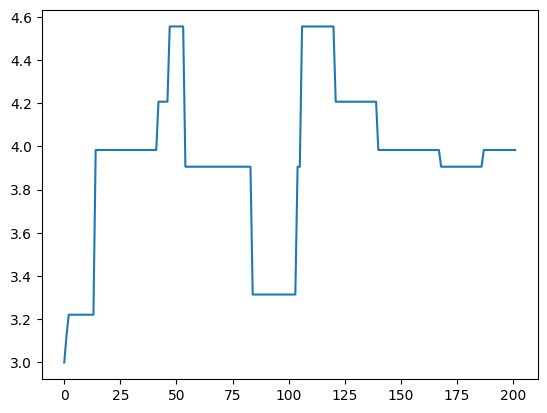

In [119]:
plt.plot(c.distances[0])
np.savetxt('csvT1_S20_s50000.csv', c.distances[0])

In [40]:
c_2 = comp(numRealSteps = 250000, numSamples = 15, temperatures = [1])

Total Imag Time:  1.2926831245422363
kmax:  4.0212385965949355
T:  8.085179925372403
(1001, 128, 128)
(1, 128, 128)
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.609375]]
[[26.953125 24.60937

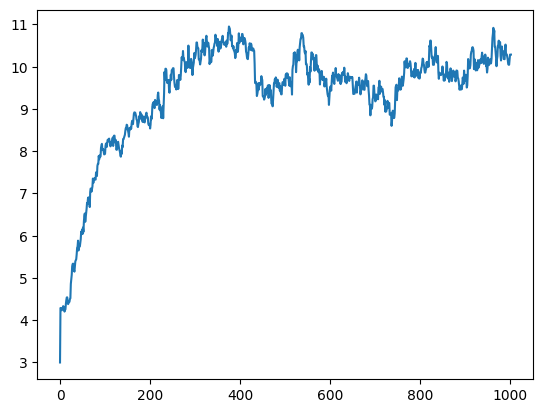

In [118]:
plt.plot(c_2.distances[0])
np.savetxt('csvT1_S15_s250000.csv', c_2.distances[0])

In [43]:
c_3 = comp(numRealSteps = 500000, numSamples = 200, temperatures = [1])

Total Imag Time:  1.3141937255859375
kmax:  4.0212385965949355
T:  8.085179925372403
(2001, 128, 128)
(1, 128, 128)
Total Imag Time:  1.3098790645599365
kmax:  4.0212385965949355
T:  8.085179925372403
(2001, 128, 128)
(1, 128, 128)
Total Imag Time:  1.3011419773101807
kmax:  4.0212385965949355
T:  8.085179925372403
(2001, 128, 128)
(1, 128, 128)
Total Imag Time:  1.2951765060424805
kmax:  4.0212385965949355
T:  8.085179925372403
(2001, 128, 128)
(1, 128, 128)
Total Imag Time:  1.3031842708587646
kmax:  4.0212385965949355
T:  8.085179925372403
(2001, 128, 128)
(1, 128, 128)
Total Imag Time:  1.303346872329712
kmax:  4.0212385965949355
T:  8.085179925372403
(2001, 128, 128)
(1, 128, 128)
[[27.734375 21.484375]]
[[27.734375 21.484375]]
[[27.734375 21.484375]]
[[27.734375 21.484375]]
[[27.734375 21.484375]]
[[27.734375 21.484375]]
[[27.734375 21.484375]]
[[27.734375 21.484375]]
[[27.734375 21.484375]]
[[27.734375 21.484375]]
[[27.734375 21.484375]]
[[27.734375 21.484375]]
[[27.734375 21.48

In [51]:
print(np.shape(c_2.distances))

(1, 1002)


In [12]:
data = np.array([[0, np.NaN, 1], [1,5,2]])
np.ma.average(np.ma.masked_array(data, np.isnan(data)), axis = 0)

masked_array(data=[0.5, 5.0, 1.5],
             mask=[False, False, False],
       fill_value=1e+20)

In [50]:
print(c_3.numRealSteps/250)

2000.0


In [54]:
print(np.shape(c_3.distances))

(1, 2002)


Text(0.5, 1.0, 'Distance Between Vortices Over Time')

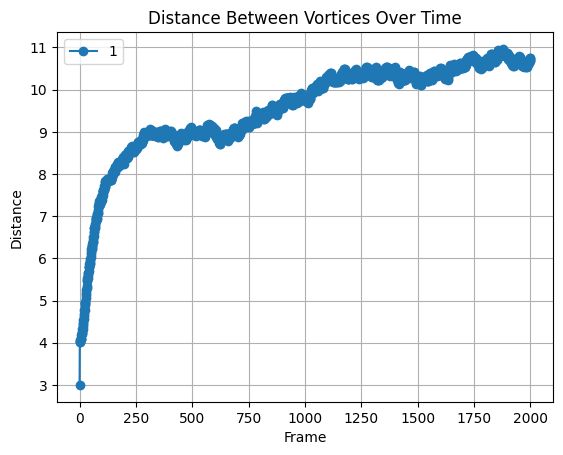

In [44]:
# 500000 time steps for 200 samples 
plt.figure() 
for i in range(len(c_3.distances)): 
    plt.plot( c_3.distances[i], label = c_3.temperatures[i], marker = 'o')
plt.grid(True)
plt.legend() 
plt.xlabel("Frame")
plt.ylabel("Distance")
plt.title("Distance Between Vortices Over Time")

In [123]:
np.savetxt('csvT1_S200_s500000.csv', c_3.distances)

In [126]:
print(np.shape(c_3.distances))

(1, 2002)


In [124]:
np.savetxt('csvT1_S200_s500000_ang.csv', c_3.angles)

In [121]:
print(np.shape(c_3.all_distance_trajectories))

(200, 1, 2002)


In [122]:
np.savetxt('csvT1_S200_s500000_alltraj.csv', c_3.all_distance_trajectories[:,0])

In [95]:
std = np.ma.std(np.ma.masked_array(c_3.all_distance_trajectories, np.isnan(c_3.all_distance_trajectories)), axis = 0)

In [110]:
print(c_3.all_distance_trajectories[0])
print(np.shape(std))
print(std[0][250:255])

[[3.         3.22117627 3.22117627 ... 7.37029776 7.37029776 7.37029776]]
(1, 2002)
[1.9525898490463014 2.1760946703695625 2.1760946703695625
 2.1760946703695625 2.500685254293508]


Text(0.5, 1.0, 'Distance Between Vortices Over Time')

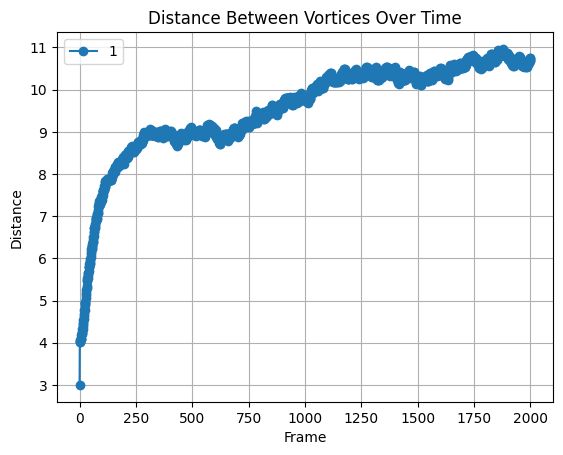

In [114]:
plt.figure() 
for i in range(len(c_3.distances)): 
    plt.plot(c_3.distances[i], label = c_3.temperatures[i], marker = 'o')
    #plt.errorbar( np.arange(0,len(c_3.distances[0])), c_3.distances[i], std, label = c_3.temperatures[i], marker = 'o')

plt.grid(True)
plt.legend() 
plt.xlabel("Frame")
plt.ylabel("Distance")
plt.title("Distance Between Vortices Over Time")

Text(0.5, 1.0, 'Angle Between Vortices Over Time')

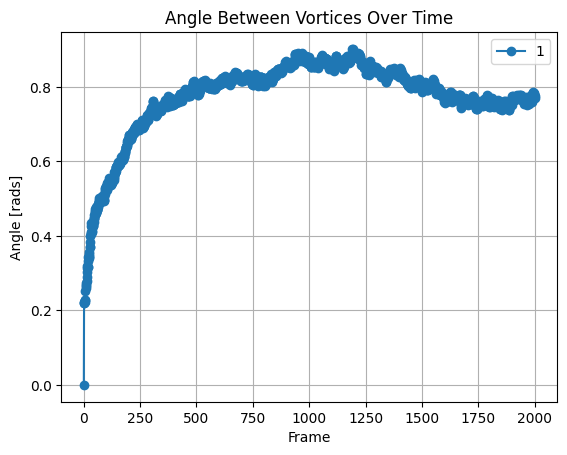

In [53]:
plt.figure() 
for i in range(len(c_3.angles)): 
    plt.plot( c_3.angles[i], label = c_3.temperatures[i], marker = 'o')
plt.grid(True)
plt.legend() 
plt.xlabel("Frame")
plt.ylabel("Angle [rads]")
plt.title("Angle Between Vortices Over Time")

In [38]:
print(c.dt*c.numRealSteps)

15.2587890625


Text(0.5, 1.0, 'Angle Between Vortices Over Time')

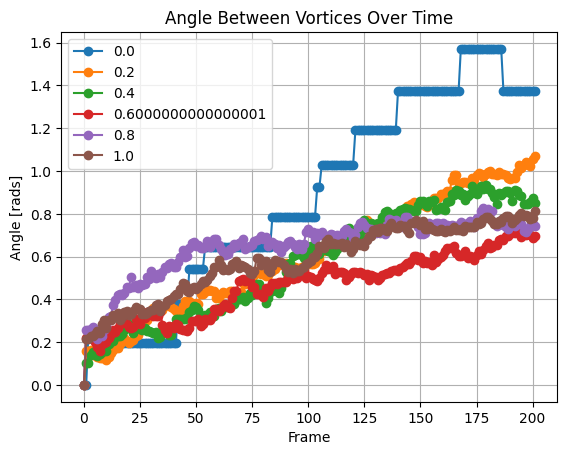

In [52]:
plt.figure() 
for i in range(len(c.angles)): 
    plt.plot( c.angles[i], label = c.temperatures[i], marker = 'o')
plt.grid(True)
plt.legend() 
plt.xlabel("Frame")
plt.ylabel("Angle [rads]")
plt.title("Angle Between Vortices Over Time")

In [8]:
print(np.shape(c.all_distance_trajectories[:,0]))

(10, 402)


In [27]:
for i in range(len(c.all_distance_trajectories)): 
    print(np.all(c.all_distance_trajectories[0][0] == c.all_distance_trajectories[i][0]))


True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


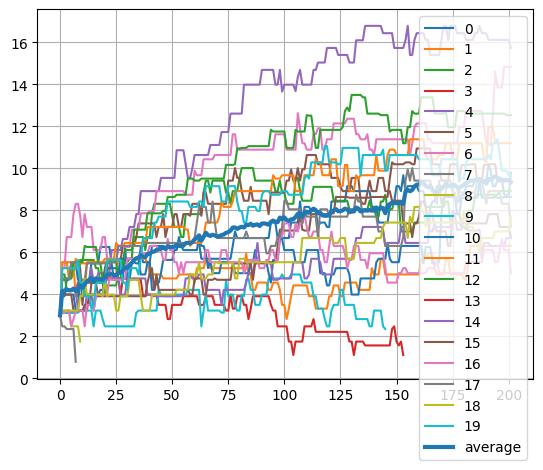

In [39]:
plt.figure() 
for i in range(len(c.all_distance_trajectories[:,-1])): 
    plt.plot(c.all_distance_trajectories[i][-1], label = i)
plt.plot(c.distances[-1], label = 'average', linewidth = 3)
plt.grid(True)
plt.legend() 
plt.show() 

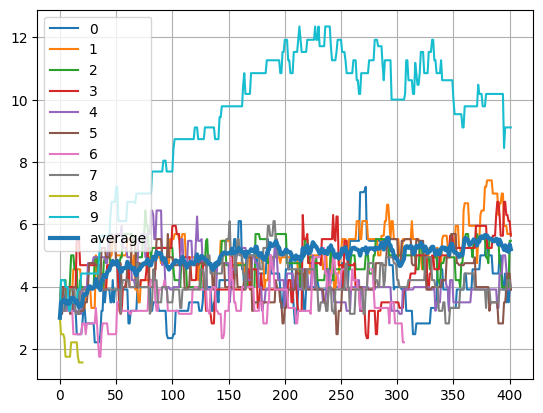

In [17]:
plt.figure() 
for i in range(len(c.all_distance_trajectories[:,0])): 
    plt.plot(c.all_distance_trajectories[i][1], label = i)
plt.plot(c.distances[1], label = 'average', linewidth = 3)
plt.grid(True)
plt.legend() 
plt.show() 

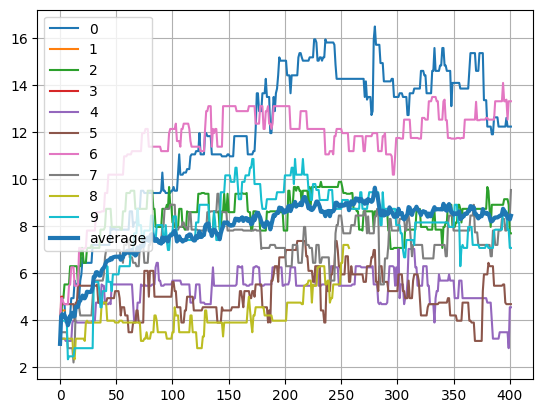

In [18]:
plt.figure() 
for i in range(len(c.all_distance_trajectories[:,0])): 
    plt.plot(c.all_distance_trajectories[i][2], label = i)
plt.plot(c.distances[2], label = 'average', linewidth = 3)
plt.grid(True)
plt.legend() 
plt.show() 

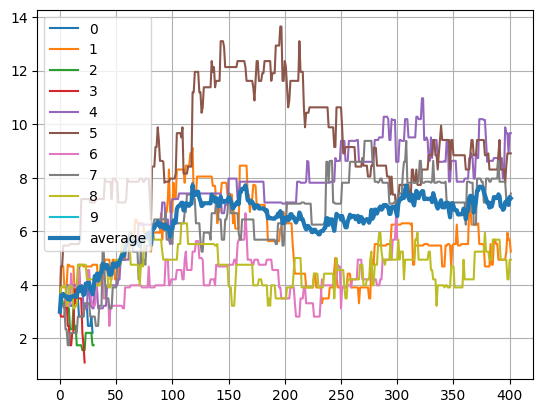

In [19]:
plt.figure() 
for i in range(len(c.all_distance_trajectories[:,0])): 
    plt.plot(c.all_distance_trajectories[i][3], label = i)
plt.plot(c.distances[3], label = 'average', linewidth = 3)
plt.grid(True)
plt.legend() 
plt.show() 

Text(0.5, 1.0, 'Distance Between Vortices Over Time')

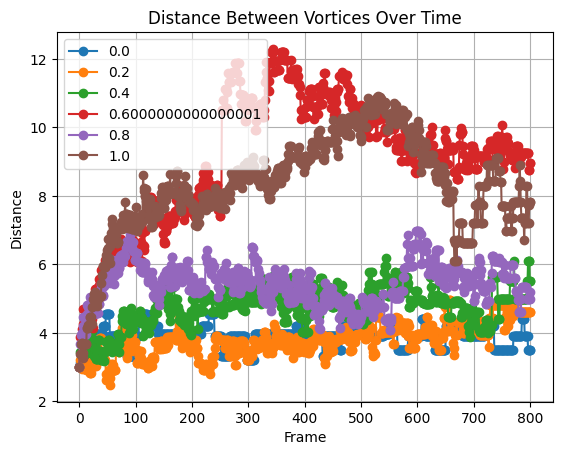

In [3]:
plt.figure() 
for i in range(len(c.distances)): 
    plt.plot( c.distances[i], label = c.temperatures[i], marker = 'o')
plt.grid(True)
plt.legend() 
plt.xlabel("Frame")
plt.ylabel("Distance")
plt.title("Distance Between Vortices Over Time")

Text(0.5, 1.0, 'Angle Between Vortices Over Time')

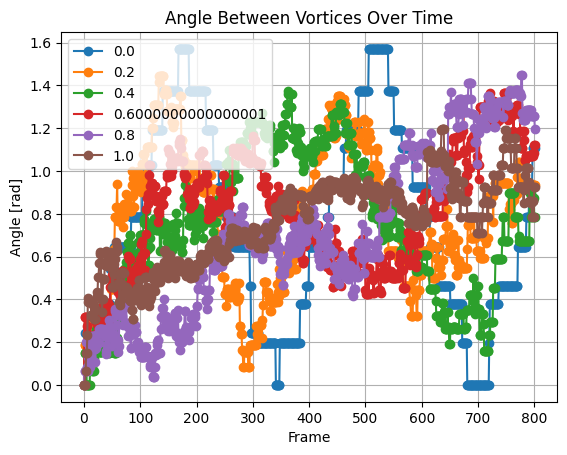

In [4]:
plt.figure() 
for i in range(len(c.angles)): 
    plt.plot( c.angles[i], label = c.temperatures[i], marker = 'o')
plt.grid(True)
plt.legend() 
plt.xlabel("Frame")
plt.ylabel("Angle [rad]")
plt.title("Angle Between Vortices Over Time")

Text(0.5, 1.0, 'Distance Between Vortices Over Time')

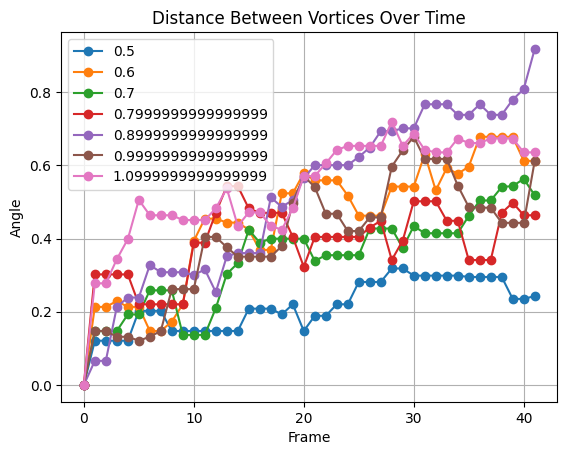

In [4]:
plt.figure() 
for i in range(len(c.distances)): 
    plt.plot( c.angles[i], label = c.temperatures[i], marker = 'o')
plt.grid(True)
plt.legend() 
plt.xlabel("Frame")
plt.ylabel("Angle")
plt.title("Distance Between Vortices Over Time")